In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\leaf3\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
df = pd.read_csv(r"F:\Prices\reviews.csv")
print(df.shape)

(430, 5)


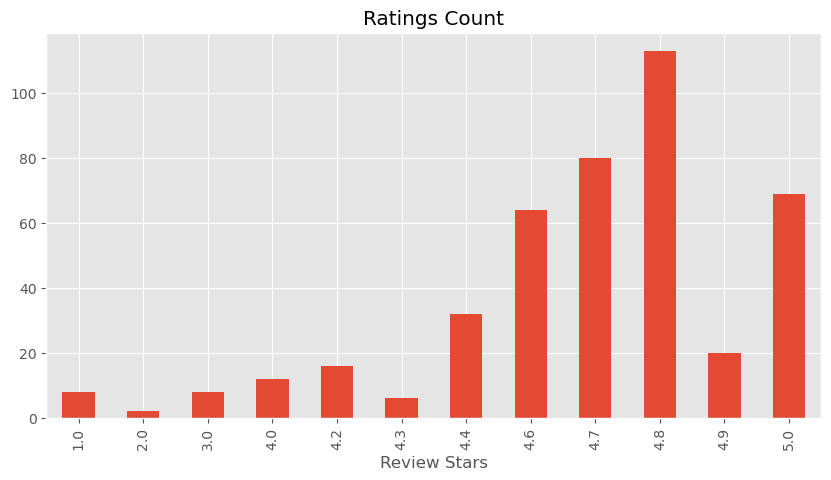

In [7]:
ax = df['Rating'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Ratings Count',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

In [8]:
example = df['Review'][25]
print(example)

Amazing style, quality and price! I am beyond happy. Thank you


In [9]:
# Run First - nltk.download('punkt')
tokens = nltk.word_tokenize(example)
tokens[:20]

['Amazing',
 'style',
 ',',
 'quality',
 'and',
 'price',
 '!',
 'I',
 'am',
 'beyond',
 'happy',
 '.',
 'Thank',
 'you']

In [10]:
# Run First - nltk.download('averaged_perceptron_tagger')

tagged = nltk.pos_tag(tokens)
tagged[:20]

[('Amazing', 'JJ'),
 ('style', 'NN'),
 (',', ','),
 ('quality', 'NN'),
 ('and', 'CC'),
 ('price', 'NN'),
 ('!', '.'),
 ('I', 'PRP'),
 ('am', 'VBP'),
 ('beyond', 'IN'),
 ('happy', 'JJ'),
 ('.', '.'),
 ('Thank', 'NN'),
 ('you', 'PRP')]

In [11]:
# Run First - nltk.download('maxent_ne_chunker')
# Run First - nltk.download('words')

entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  Amazing/JJ
  style/NN
  ,/,
  quality/NN
  and/CC
  price/NN
  !/.
  I/PRP
  am/VBP
  beyond/IN
  happy/JJ
  ./.
  Thank/NN
  you/PRP)


In [12]:
# Using Vader
# VADER - VADER (Valence Aware Dictionary and sEntiment Reasoner)

# Run First - nltk.download('vader_lexicon')

from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [13]:
# Test Positive Sentence

sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [30]:
# Test Negative Sentence

sia.polarity_scores('This is the worst thing ever.')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [14]:
# Testing our sentence

print(f"Reveiw: {example}")
sia.polarity_scores(example)

Reveiw: Amazing style, quality and price! I am beyond happy. Thank you


{'neg': 0.0, 'neu': 0.405, 'pos': 0.595, 'compound': 0.8832}

In [15]:
df

,Website,Sku,Rating,Review,Date Added
0,Livingspaces,248772,4.6,"Clean look, quality piece. Great upgrade to th...",06/18/2023
1,Livingspaces,248772,4.6,I love how modern this nightstand is. I got th...,06/18/2023
2,Livingspaces,248772,4.6,Great service. They found just what I was look...,06/18/2023
3,Livingspaces,248772,4.6,Love this spacious and beautiful nightstand! T...,06/18/2023
4,Livingspaces,248772,4.6,Spacious and modern! Goes with my Grey bed as ...,06/18/2023
...,...,...,...,...,...
425,Rcwilley,1770357,5.0,I actually enjoy having this in my room. It br...,06/19/2023
426,Rcwilley,1770357,5.0,Drawers are roomy and deep. Slide nicely and q...,06/19/2023
427,Rcwilley,1770357,5.0,"Very nice look, drawers open and close with ea...",06/19/2023
428,Rcwilley,1770357,5.0,Beautiful design. The built-in charging statio...,06/19/2023


In [16]:
# Run the polarity score on the entire dataset
# Using a progress bar to show proccessing progress.

res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Review']
    myid = i  # Use the DataFrame index as the identifier
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/430 [00:00<?, ?it/s]

In [18]:
pd.DataFrame(res).T

,neg,neu,pos,compound
0,0.000,0.507,0.493,0.7783
1,0.000,0.641,0.359,0.8555
2,0.000,0.619,0.381,0.8126
3,0.000,0.682,0.318,0.8553
4,0.000,0.923,0.077,0.1260
...,...,...,...,...
425,0.000,0.704,0.296,0.8126
426,0.000,0.632,0.368,0.7906
427,0.000,0.551,0.449,0.8381
428,0.000,0.698,0.302,0.5994


In [19]:
# Since I am dumb and didnt add an ID column into my data
# We are using our df index to mrege

vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
merged_df = df.merge(vaders, how='left', left_index=True, right_index=True)
vaders = merged_df


In [20]:
vaders


,Website,Sku,Rating,Review,Date Added,Id,neg,neu,pos,compound
0,Livingspaces,248772,4.6,"Clean look, quality piece. Great upgrade to th...",06/18/2023,0,0.000,0.507,0.493,0.7783
1,Livingspaces,248772,4.6,I love how modern this nightstand is. I got th...,06/18/2023,1,0.000,0.641,0.359,0.8555
2,Livingspaces,248772,4.6,Great service. They found just what I was look...,06/18/2023,2,0.000,0.619,0.381,0.8126
3,Livingspaces,248772,4.6,Love this spacious and beautiful nightstand! T...,06/18/2023,3,0.000,0.682,0.318,0.8553
4,Livingspaces,248772,4.6,Spacious and modern! Goes with my Grey bed as ...,06/18/2023,4,0.000,0.923,0.077,0.1260
...,...,...,...,...,...,...,...,...,...,...
425,Rcwilley,1770357,5.0,I actually enjoy having this in my room. It br...,06/19/2023,425,0.000,0.704,0.296,0.8126
426,Rcwilley,1770357,5.0,Drawers are roomy and deep. Slide nicely and q...,06/19/2023,426,0.000,0.632,0.368,0.7906
427,Rcwilley,1770357,5.0,"Very nice look, drawers open and close with ea...",06/19/2023,427,0.000,0.551,0.449,0.8381
428,Rcwilley,1770357,5.0,Beautiful design. The built-in charging statio...,06/19/2023,428,0.000,0.698,0.302,0.5994


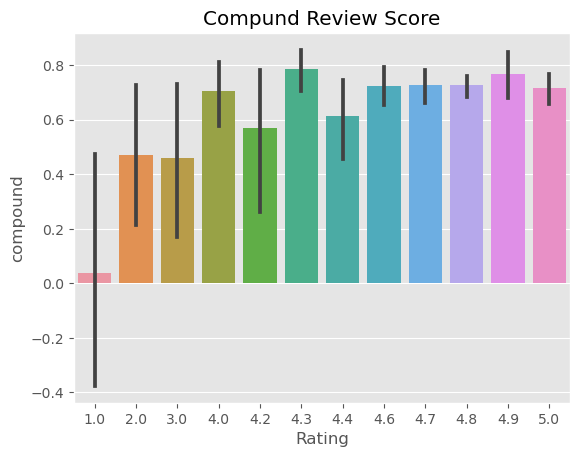

In [21]:
ax = sns.barplot(data=vaders, x='Rating', y='compound')
ax.set_title('Compund Review Score')
plt.show()

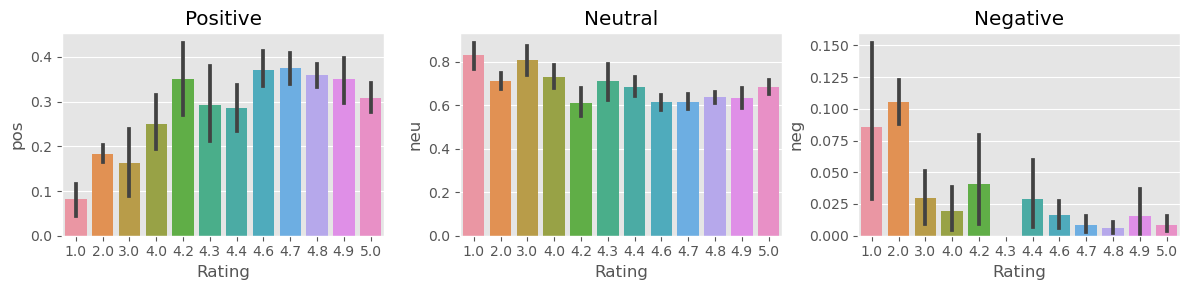

In [22]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Rating', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Rating', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Rating', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

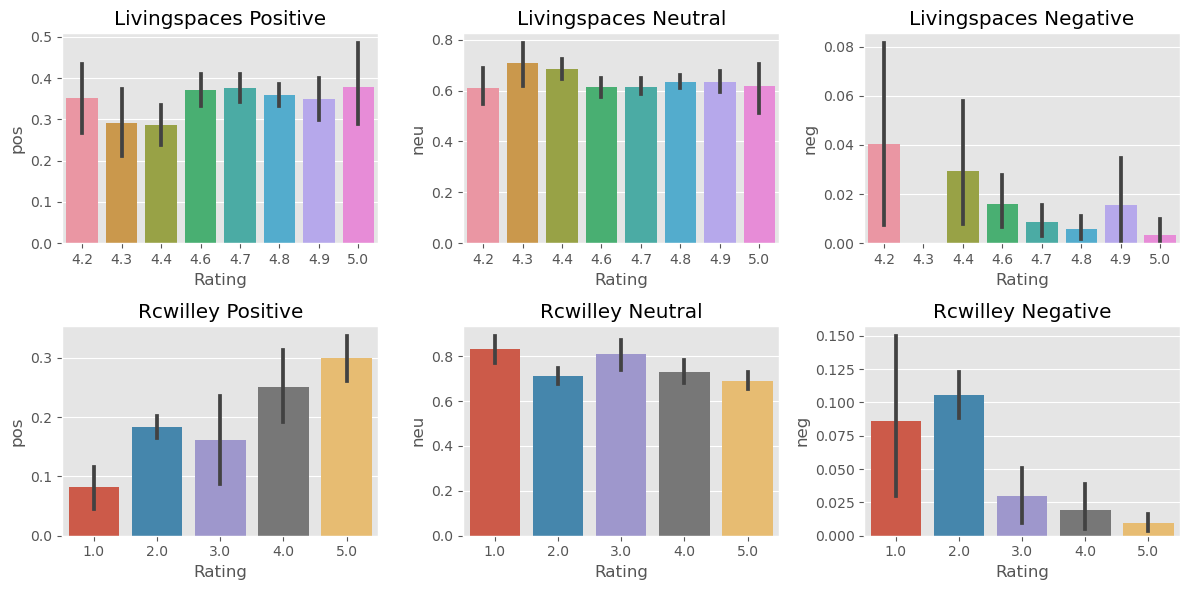

In [23]:
# Separate the charts by website

livingspaces_vaders = vaders[vaders['Website'] == 'Livingspaces']
rcwilley_vaders = vaders[vaders['Website'] == 'Rcwilley']

fig, axs = plt.subplots(2, 3, figsize=(12, 6))
sns.barplot(data=livingspaces_vaders, x='Rating', y='pos', ax=axs[0, 0])
sns.barplot(data=livingspaces_vaders, x='Rating', y='neu', ax=axs[0, 1])
sns.barplot(data=livingspaces_vaders, x='Rating', y='neg', ax=axs[0, 2])
axs[0, 0].set_title('Livingspaces Positive')
axs[0, 1].set_title('Livingspaces Neutral')
axs[0, 2].set_title('Livingspaces Negative')

sns.barplot(data=rcwilley_vaders, x='Rating', y='pos', ax=axs[1, 0])
sns.barplot(data=rcwilley_vaders, x='Rating', y='neu', ax=axs[1, 1])
sns.barplot(data=rcwilley_vaders, x='Rating', y='neg', ax=axs[1, 2])
axs[1, 0].set_title('Rcwilley Positive')
axs[1, 1].set_title('Rcwilley Neutral')
axs[1, 2].set_title('Rcwilley Negative')

plt.tight_layout()
plt.show()
